In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Get the current working directory
cwd = os.getcwd()

# List all files in the current working directory
files = os.listdir(cwd)

# test
csv_files = [file for file in files if file.endswith('.csv')]

if csv_files:
    first_csv_file = csv_files[0]
    print(f"Reading file: {first_csv_file}")
    
    df = pd.read_csv(first_csv_file)
    print(df.head())

Reading file: light_floor_incorrectposture_data.csv
  Unnamed: 0            Name Skeleton_25_marker:Head  \
0        NaN             NaN                Rotation   
1      Frame  Time (Seconds)                       X   
2          0        0.000000               -0.307504   
3          1        0.008333               -0.308270   
4          2        0.016667               -0.308799   

  Skeleton_25_marker:Head.1 Skeleton_25_marker:Head.2  \
0                  Rotation                  Rotation   
1                         Y                         Z   
2                 -0.617607                  0.201053   
3                 -0.617442                  0.202038   
4                 -0.617974                  0.202944   

  Skeleton_25_marker:Head.3 Skeleton_25_marker:Head.4  \
0                  Rotation                  Position   
1                         W                         X   
2                 -0.695400               -163.932144   
3                 -0.694921             

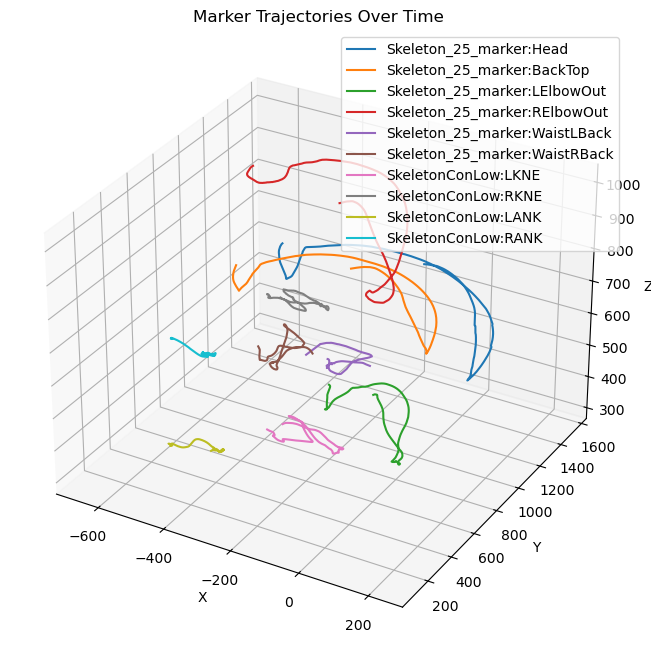

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the first CSV file with a multi-level header
df = pd.read_csv(first_csv_file, header=[0, 1, 2])  # Replace `first_csv_file` with the file variable or path

# List of body parts to extract
body_parts = [
    'Skeleton_25_marker:Head', 'Skeleton_25_marker:BackTop', 
    'Skeleton_25_marker:LElbowOut', 'Skeleton_25_marker:RElbowOut',
    'Skeleton_25_marker:WaistLBack', 'Skeleton_25_marker:WaistRBack',
    'SkeletonConLow:LKNE', 'SkeletonConLow:RKNE',
    'SkeletonConLow:LANK', 'SkeletonConLow:RANK'
]

# Filter columns where:
# - The first header (body part) matches one of the body_parts
# - The second header is 'Position'
selected_columns = df.loc[:, 
    (df.columns.get_level_values(0).isin(body_parts)) & 
    (df.columns.get_level_values(1) == 'Position')
]

# Extract the time column (second column, starting from the 4th row)
time = df.iloc[3:, 1].reset_index(drop=True).astype(float)

# Initialize a 3D plot for trajectories
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot trajectories for each body part
for body_part in body_parts:
    # Extract X, Y, Z for the current body part
    x = selected_columns.loc[:, (body_part, 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
    y = selected_columns.loc[:, (body_part, 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
    z = selected_columns.loc[:, (body_part, 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)
    
    # Plot in 3D
    ax.plot(x, y, z, label=body_part)

# Add plot details
ax.set_title('Marker Trajectories Over Time')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(loc='upper right')
plt.show()

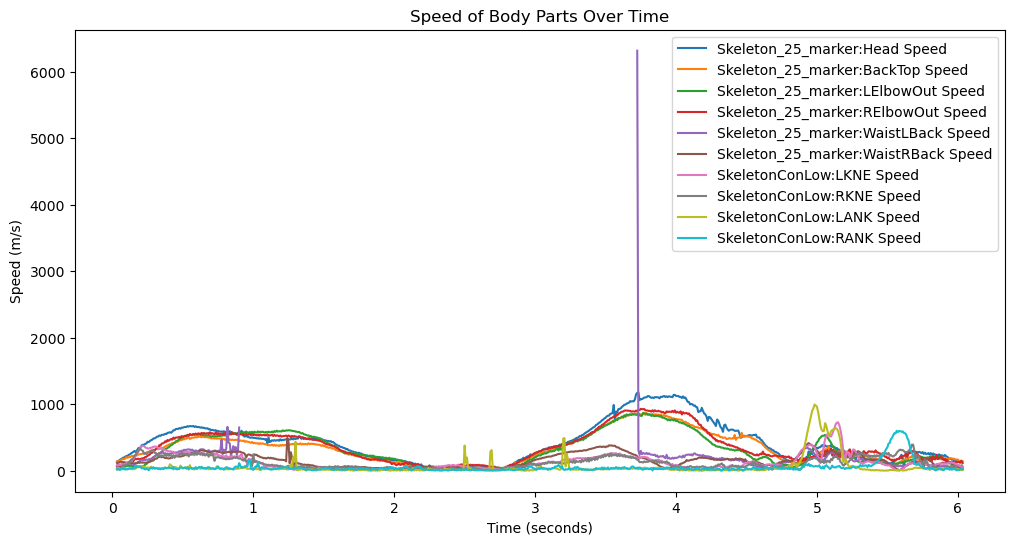

In [15]:
import numpy as np

# Calculate speed for each marker
def calculate_speed(x, y, z, time):
    dx = np.diff(x)  # Change in X
    dy = np.diff(y)  # Change in Y
    dz = np.diff(z)  # Change in Z
    dt = np.diff(time)  # Change in time
    speed = np.sqrt(dx**2 + dy**2 + dz**2) / dt  # Speed formula
    return speed

# Plot speed for each body part
plt.figure(figsize=(12, 6))
for body_part in body_parts:
    x = selected_columns.loc[:, (body_part, 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
    y = selected_columns.loc[:, (body_part, 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
    z = selected_columns.loc[:, (body_part, 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)
    speed = calculate_speed(x.values, y.values, z.values, time.values)
    plt.plot(time[1:], speed, label=f'{body_part} Speed')

plt.title('Speed of Body Parts Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Speed (m/s)')
plt.legend()
plt.show()

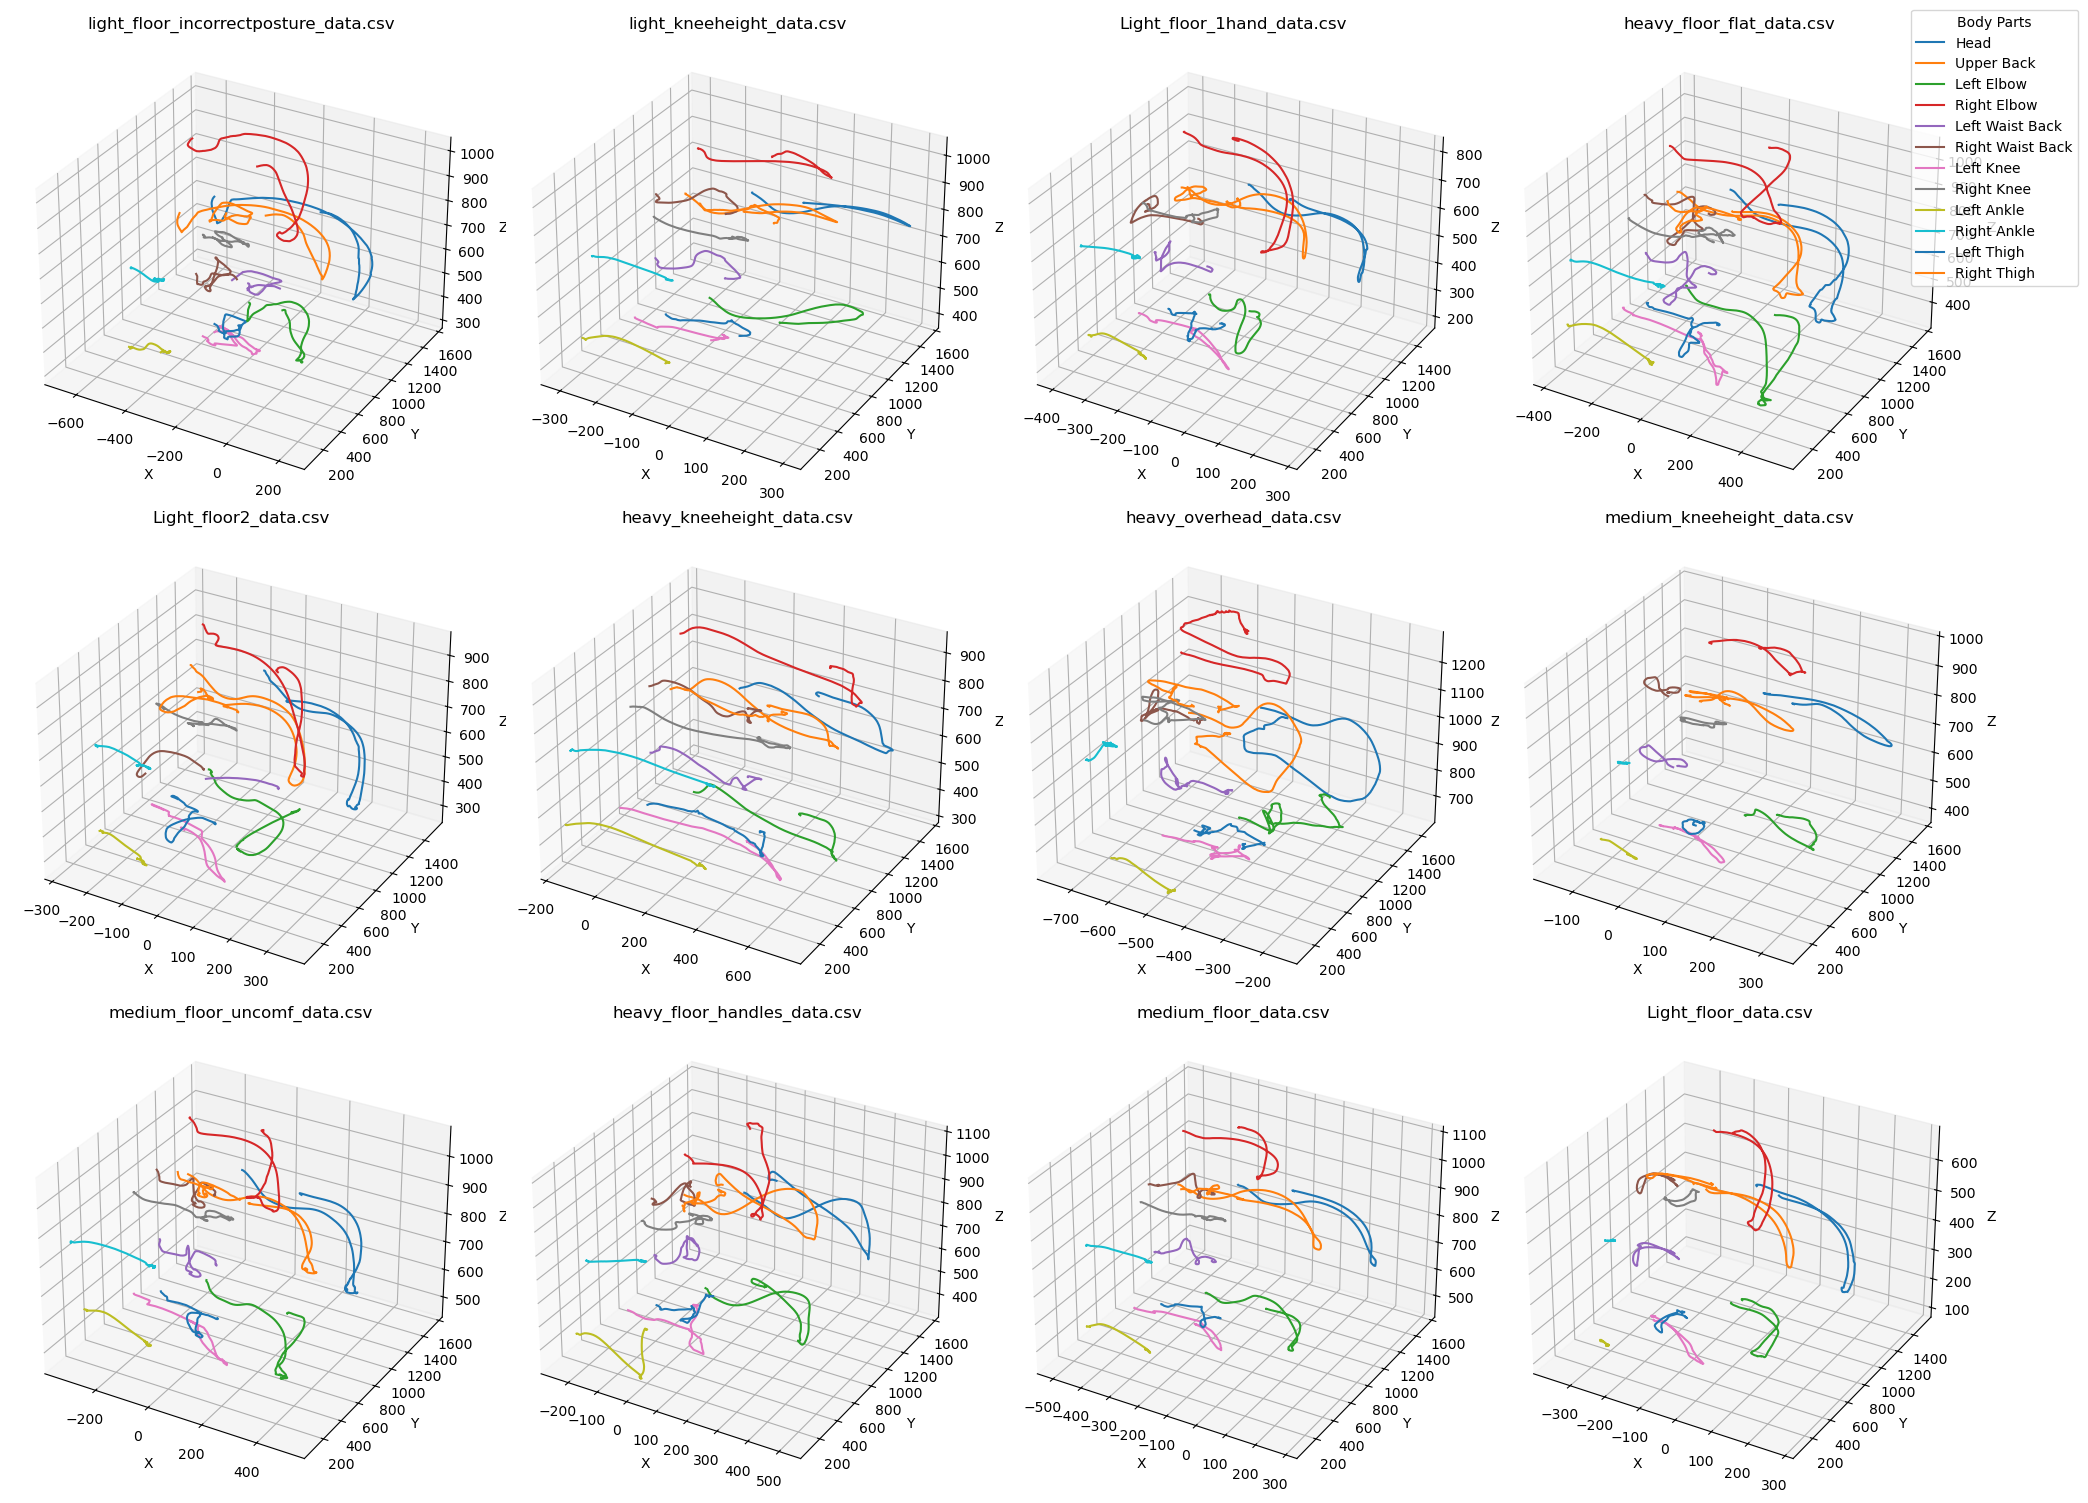

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get the current working directory
cwd = os.getcwd()

# List all files in the current working directory
files = os.listdir(cwd)

# Filter out only the CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# Map of body parts to more readable labels for the legend
body_part_labels = {
    'Skeleton_25_marker:Head': 'Head',
    'Skeleton_25_marker:BackTop': 'Upper Back',
    'Skeleton_25_marker:LElbowOut': 'Left Elbow',
    'Skeleton_25_marker:RElbowOut': 'Right Elbow',
    'Skeleton_25_marker:WaistLBack': 'Left Waist Back',
    'Skeleton_25_marker:WaistRBack': 'Right Waist Back',
    'SkeletonConLow:LKNE': 'Left Knee',
    'SkeletonConLow:RKNE': 'Right Knee',
    'SkeletonConLow:LANK': 'Left Ankle',
    'SkeletonConLow:RANK': 'Right Ankle',
    'SkeletonConLow:LTHI': 'Left Thigh',
    'SkeletonConLow:RTHI': 'Right Thigh',
}

# List of body parts to extract
body_parts = list(body_part_labels.keys())  # Use the keys of the dictionary

# Check if CSV files are found and process them
if csv_files:
    # Calculate the number of rows and columns for subplots
    num_files = len(csv_files)
    num_rows = 3
    num_cols = 4
    
    # Create the figure with subplots (3x4 grid)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15), subplot_kw={'projection': '3d'})

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Initialize a list to store the handles and labels for the legend
    handles = []
    labels = []

    # Iterate through each CSV file and plot
    for idx, csv_file in enumerate(csv_files):
        if idx >= num_rows * num_cols:
            break  # Stop if there are more files than available subplots

        # Read each CSV file with a multi-level header
        df = pd.read_csv(csv_file, header=[0, 1, 2])  # Adjust header levels if necessary

        # Filter columns based on body parts and 'Position'
        selected_columns = df.loc[:, 
            (df.columns.get_level_values(0).isin(body_parts)) & 
            (df.columns.get_level_values(1) == 'Position')
        ]

        # Extract the time column (second column, starting from the 4th row)
        time = df.iloc[3:, 1].reset_index(drop=True).astype(float)

        # Get the current subplot axis
        ax = axes[idx]

        # Plot trajectories for each body part in the current CSV file
        for body_part in body_parts:
            # Extract X, Y, Z for the current body part
            x = selected_columns.loc[:, (body_part, 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
            y = selected_columns.loc[:, (body_part, 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
            z = selected_columns.loc[:, (body_part, 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

            # Plot in 3D
            line, = ax.plot(x, y, z, label=body_part_labels.get(body_part, body_part))  # Use the human-readable label

            # Store the line handle and label for the legend (only once)
            if idx == 0:  # Only collect handles and labels for the first subplot
                handles.append(line)
                labels.append(body_part_labels.get(body_part, body_part))  # Use the human-readable label

        # Set plot details
        ax.set_title(f'{csv_file}')  # Title with file name
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    # Add a single legend to the first plot or the entire figure
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1), title="Body Parts")

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

else:
    print("No CSV files found in the current directory.")

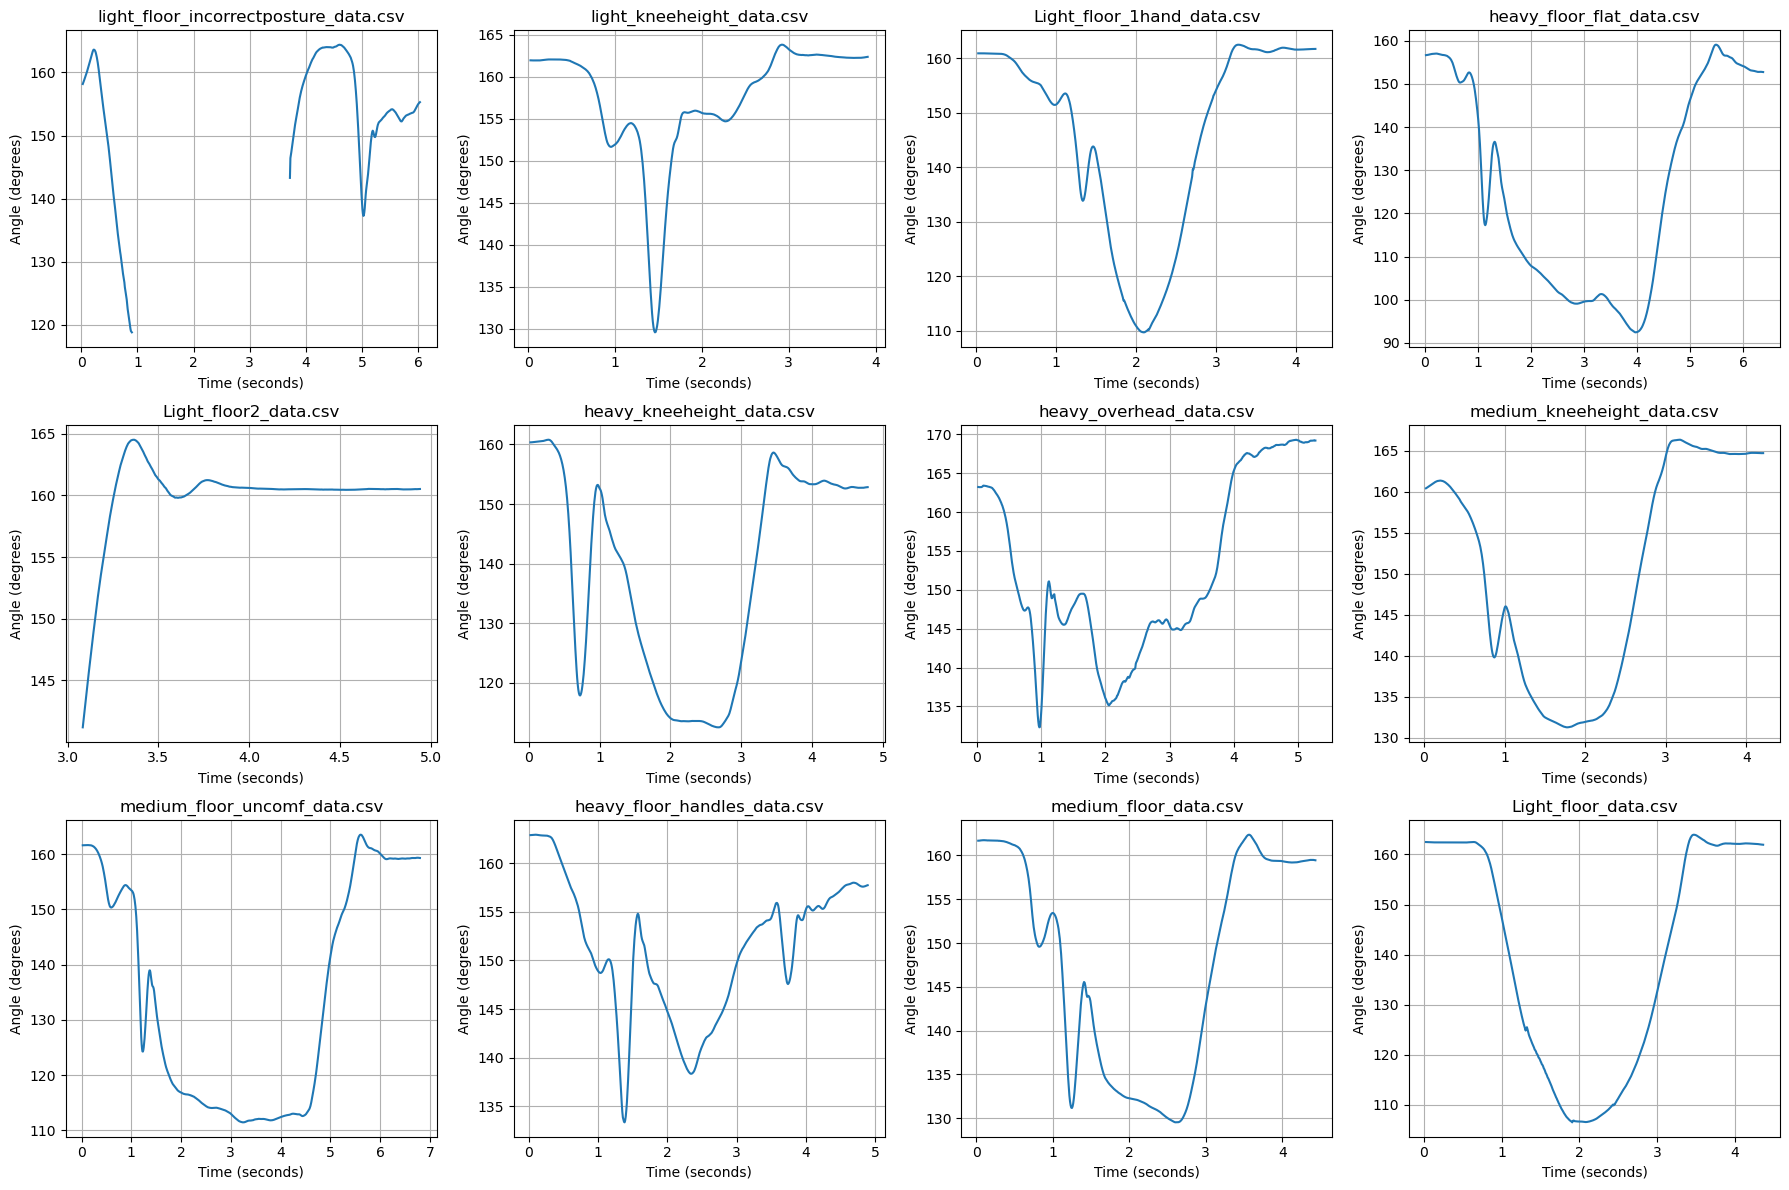

In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the angle between three points (modified)
def calculate_angle(x1, y1, z1, x2, y2, z2, x3, y3, z3):
    # Calculate vectors from points 2 -> 1 and 2 -> 3 (reversed order)
    v1 = np.array([x1 - x2, y1 - y2, z1 - z2])  # Vector from knee to hip
    v2 = np.array([x3 - x2, y3 - y2, z3 - z2])  # Vector from knee to ankle
    
    # Compute the cosine of the angle between the vectors
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    cos_angle = dot_product / (magnitude_v1 * magnitude_v2)
    
    # Ensure the cosine value is in the valid range for arccos
    angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))
    
    return np.degrees(angle)  # Convert from radians to degrees

# Get the current working directory
cwd = os.getcwd()

# List all files in the current working directory
files = os.listdir(cwd)

# Filter out only the CSV files
csv_files = [file for file in files if file.endswith('.csv')]

# List of body parts to extract (adjust as per your data structure)
body_parts = [
    'Skeleton_25_marker:WaistLBack',  # Hip
    'SkeletonConLow:LKNE',  # Knee
    'SkeletonConLow:LANK'  # Ankle
]

# Calculate the number of rows and columns for the 3x4 grid
rows = 3
cols = 4

# Create subplots (3 rows, 4 columns)
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through each CSV file and generate a plot for each
for i, csv_file in enumerate(csv_files):
    # Ensure we do not exceed the number of subplots
    if i >= rows * cols:
        break
    
    # Read each CSV file with a multi-level header
    df = pd.read_csv(csv_file, header=[0, 1, 2])  # Adjust header levels if necessary

    # Filter columns based on body parts and 'Position'
    selected_columns = df.loc[:, 
        (df.columns.get_level_values(0).isin(body_parts)) & 
        (df.columns.get_level_values(1) == 'Position')
    ]

    # Extract the time column (second column, starting from the 4th row)
    time = df.iloc[3:, 1].reset_index(drop=True).astype(float)

    # Extract X, Y, Z for each of the 3 points (Hip, Knee, and Ankle)
    x1 = selected_columns.loc[:, ('Skeleton_25_marker:WaistLBack', 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
    y1 = selected_columns.loc[:, ('Skeleton_25_marker:WaistLBack', 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
    z1 = selected_columns.loc[:, ('Skeleton_25_marker:WaistLBack', 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

    x2 = selected_columns.loc[:, ('SkeletonConLow:LKNE', 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
    y2 = selected_columns.loc[:, ('SkeletonConLow:LKNE', 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
    z2 = selected_columns.loc[:, ('SkeletonConLow:LKNE', 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

    x3 = selected_columns.loc[:, ('SkeletonConLow:LANK', 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
    y3 = selected_columns.loc[:, ('SkeletonConLow:LANK', 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
    z3 = selected_columns.loc[:, ('SkeletonConLow:LANK', 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

    # Calculate the angle for each frame (time step)
    angles = [calculate_angle(x1[i], y1[i], z1[i], x2[i], y2[i], z2[i], x3[i], y3[i], z3[i]) for i in range(len(time))]

    # Plot angle over time for each CSV file in the corresponding subplot
    axes[i].plot(time, angles)
    axes[i].set_title(f'{csv_file}')
    axes[i].set_xlabel('Time (seconds)')
    axes[i].set_ylabel('Angle (degrees)')
    axes[i].grid(True)

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [50]:
# Extract X, Y, Z for each of the 3 points (Hip, Knee, and Ankle)
x1 = selected_columns.loc[:, ('Skeleton_25_marker:WaistLBack', 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
y1 = selected_columns.loc[:, ('Skeleton_25_marker:WaistLBack', 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
z1 = selected_columns.loc[:, ('Skeleton_25_marker:WaistLBack', 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

x2 = selected_columns.loc[:, ('SkeletonConLow:LKNE', 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
y2 = selected_columns.loc[:, ('SkeletonConLow:LKNE', 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
z2 = selected_columns.loc[:, ('SkeletonConLow:LKNE', 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

x3 = selected_columns.loc[:, ('SkeletonConLow:LANK', 'Position', 'X')].iloc[3:].reset_index(drop=True).astype(float)
y3 = selected_columns.loc[:, ('SkeletonConLow:LANK', 'Position', 'Y')].iloc[3:].reset_index(drop=True).astype(float)
z3 = selected_columns.loc[:, ('SkeletonConLow:LANK', 'Position', 'Z')].iloc[3:].reset_index(drop=True).astype(float)

# Calculate the initial angle (at the start)
initial_angle = calculate_angle(x1[0], y1[0], z1[0], x2[0], y2[0], z2[0], x3[0], y3[0], z3[0])
print(f"Initial knee angle (should be ~180 degrees): {initial_angle} degrees")

Initial knee angle (should be ~180 degrees): 162.4886143961209 degrees
